# Final Project
## DTSC-670
## David Thomas
### 5-30-2024

## Overview
Below is an end-to-end machine learning project, the goal of which is to use data collected from high schools to predict student performance. It includes code as well as written explanations to make it accessible to the non-technical target audience: school leadership members. Using a regression approach, the project successfully produced a predictive model that takes in 27 numerical and categorical/ordinal features and outputs a student's predicted end-of-year grade with reasonable accuracy.


## Framing Problem & Big Picture
### Problem & Objective
Our objective in this project is to develop a predictive model that can take in student data and output a prediction for their end-of-year (G3) grade. This might help to identify students who may be at risk of academic hardship so that action can be taken to aid them. This might also help to identify critical factors that tend to determine academic success, so that teachers, school leadership, students, and families can take measures to improve student performance.

### Framing the Problem
Because we have access to a large and relatively complete dataset, including data for our target variable: final (G3) grade, we will execute this task using supervised learning. <br><br> 
Supervised learning involves showing a computer data for one or more factors, and the resulting "target" variable. With enough exposure to many data points, the computer can "learn" how the different factors influence the target's value, and is then capable of making predictions of what the target's value will be given new data. Supervised learning is only possible when we have known data for our target variable. <br><br> 
Unsupervised learning is possible when we do not have data for our target variable. In unsupervised learning, the computer is again exposed to data for one or more factors, and is capable of identifying patterns within that data. Among the most useful tasks that can be achieved with unsupervised learning is called "clustering", where the computer is capable of defining a number of groups with similar properties into which each data point is assigned. The computer is then capable of classifying new data into these groups. <br><br>
We'd like our model to be able to continue to improve itself as new data becomes available. Therefore, we would ideally use "online" learning. The alternative would be an "offline" (or "batch") approach, in which our model is trained only once using all of the data that is available at the time. As we all know, the only constant in life is change, so it's only reasonable to expect the relative importance of influencial factors of a student's final grade to shift with time. Using an offline approach, we'd have to retrain our model using ALL of the available data whenever we want to update the model. Because this can become quite resource intensive, we're probably better off with an online approach.


### Machine Learning Task
The goal of this project is to predict a continuous numerical value: a student's final (G3) grade. Therefore, we will utilize "regression". <br><br> 
Regression enables us to determine how much (and in which direction) each factor influences a student's final grade. There exists another machine learning apparatus (which we will not use) called "classification". The goal of classification is to make a prediction about which *category* a data point will belong to. We might have considered using classification to predict whether a student's final grade would be a passing grade vs. a failing grade. We instead have chosen to predict a numerical value for their final grade, which is why we will be using regression and not classification.

### Measuring Model Performance
In order to measure the performance of our model, we will utilize a statistic called "root-mean squared error", or "RMSE". We'll first withhold 20% of our available data to use for testing purposes; the other 80% will be used to train our predictive model. We will use our model to predict the results for the unseen 20% of data points, then compare the computer's predictions with the students' actual final (G3) scores. The RMSE between the predicted scores and the actual scores will tell us how far off, on average, our model comes from predicting students' correct final grade.

### Additional Information
It's best to have reasonable expectations with regard to predictive modeling. At the end of the day, we will never have a crystal ball that can predict the future with complete, unfailing accuracy. There are many factors that will affect the quality of our predictive model. Is the student data we have today a perfect representation of all of the types of students that will ever attend school? Doubtful. Are there underlying assumptions that the model will be unable to account for? Likely. Do we have enough data? We'd always like to have more data. For these reasons and more, we must temper our expectations and understand that the tool we will create in this project will likely be a useful one, but not a flawless one; and therefore we must be mindful about how we use it.


In [1]:
# import required libraries
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Get the Data
### Import Data




In [2]:
# import dataset, store as a DataFrame
student_data = pd.read_csv("student-mat.csv")


### Check Size & Type

In [3]:
# check size and datatypes
student_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

### List of Features
Each datapoint represents an individual student. The following data is known for each student:

- school: the school at which the student is enrolled ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- sex: the gender of the student ("F" or "M")
- age: the student's age
- address: the student's home type (either "urban" or "rural")
- famsize: the size of the student's family (either "less than 3" or "greater than 3")
- Pstatus: parents' cohabitation status ("T" - living together or "A" - apart)
- Medu: mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education, or 4 – higher education)
- Fedu: father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education, or 4 – higher education)
- Mjob: mother's job ("teacher", "health" care related, civil "services", "at_home", or "other")
- Fjob: father's job ("teacher", "health" care related, civil "services", "at_home", or "other")
- reason: reason student chose this school (close to "home", school "reputation", "course"
preference, or "other")
- guardian: student's guardian ("mother", "father" or "other")
- traveltime: home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour)
- studytime: weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
- failures: number of past class failures (n if 1<=n<3, else 4)
- schoolsup: extra educational support ("yes" or "no")
- famsup: family educational support ("yes" or "no")
- paid: extra paid classes within the course subject ("yes" or "no")
- activities: extra-curricular activities ("yes" or "no")
- nursery: attended nursery school ("yes" or "no")
- higher: wants to take higher education ("yes" or "no")
- internet: internet access at home ("yes" or "no")
- romantic: with a romantic relationship ("yes" or "no")
- famrel: quality of family relationships (from 1 - very bad to 5 - excellent)
- freetime: free time after school (from 1 - very low to 5 - very high)
- goout: going out with friends (from 1 - very low to 5 - very high)
- Dalc: workday alcohol consumption (from 1 - very low to 5 - very high)
- Walc: weekend alcohol consumption (from 1 - very low to 5 - very high)
- health: current health status (from 1 - very bad to 5 - very good)
- absences_G1: number of school absences for G1 term
- absences_G2: number of school absences for G2 term
- absences_G3: number of school absences for G3 term
- G1: first term grade
- G2: second term grade


### Target
- G3: final grade <br>
The target which we will predict is students' numeric final (G3) grade.


### Split Dataset into Training and Test Set

In [4]:
# import `train_test_split` class
from sklearn.model_selection import train_test_split

# separate features (X) and labels (y)
X = student_data.drop("G3", axis=1)
y = student_data["G3"]

# randomly allocate 80% of data into training set, 20% into test set
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)


## Explore the Data
### Study Training Set Attributes and Characteristics

In [5]:
# explore statistical characteristics of features
X_train.describe(include='all')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,316,316,305.000000,316,316,316,316.000000,316.000000,316,316,...,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,282,170,NaN,247,226,284,NaN,NaN,110,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.747541,NaN,NaN,NaN,2.734177,2.544304,NaN,NaN,...,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,NaN,NaN,1.274188,NaN,NaN,NaN,1.080375,1.078476,NaN,NaN,...,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,...,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000


In [6]:
# explore statistical characteristics of labels
y_train.describe()

count    316.000000
mean      10.325949
std        4.590337
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       20.000000
Name: G3, dtype: float64

### Visuals
Below are several visual representations of selections from our dataset which we will analyze in order to look for patterns in the data. In each of the figures below, the blue points represent students from Gabriel Pereira, and the pink dots represent students from Mousinho da Silveiramale.

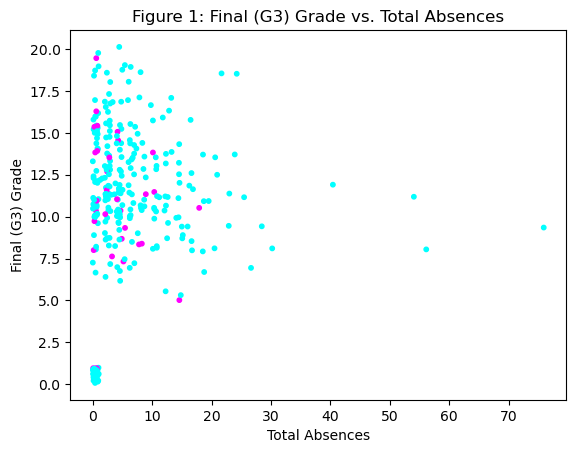

In [7]:
# select data to plot
x = (X_train["absences_G1"] + X_train["absences_G2"] + X_train["absences_G3"]).astype('float')
y = y_train.astype('float')

# assign color based on school
color = []
school_color_dict = {"GP":65, "MS":75}
for school in X_train["school"]:
    if school:
        color.append(school_color_dict[school])
    else:
        color.append(50)

# to mitigate overlapping points, add random jitter to final grade data
x = x + np.random.rand(len(X_train))
y = y + np.random.rand(len(X_train))
        
# construct scatterplot
plt.scatter(x, y, s=10, c=color, cmap="cool")

# include labels
plt.title("Figure 1: Final (G3) Grade vs. Total Absences")
plt.xlabel("Total Absences")
plt.ylabel("Final (G3) Grade")

# display scatterplot
plt.show()


Figure 1 allows us to look for patterns between a student's total number of absences and their final (G3) grade. From this visual, we can see that there is likely a negative correlation between these variables. As a student's total absences increases, their final grade tends to decrease.

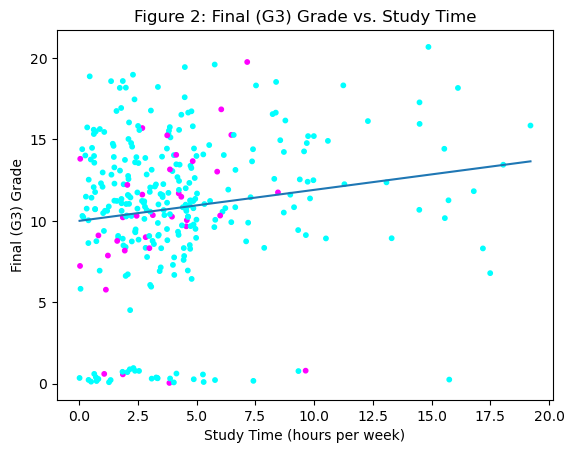

In [8]:
# select data to plot
x = X_train["studytime"].astype('float')
y = y_train.astype('float')

# modify `studytime` data to represent hours, rather than encoded values
# use RNG to set hours value within encoded range
x = x.reset_index(drop=True)
for i in range(len(x)):
    if x[i] == 1:
        # randomly select a value between 0 - 2 hours
        x[i] = np.random.rand(1) * 2
    elif x[i] == 2:
        # randomly select a value between 2 - 5 hours
        x[i] = 2 + np.random.rand(1) * 3
    elif x[i] == 3:
        # randomly select a value between 5 - 10 hours
        x[i] = 5 + np.random.rand(1) * 5
    elif x[i] == 4:
        # randomly select a value between 10 - 20 hours
        x[i] = 10 + np.random.rand(1) * 10

# to mitigate overlapping points, add random jitter to final grade data
y = y + np.random.rand(len(X_train))

# construct scatterplot
plt.scatter(x, y, s=10, c=color, cmap="cool")

# include labels
plt.title("Figure 2: Final (G3) Grade vs. Study Time")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final (G3) Grade")

# include trendline
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# display scatterplot
plt.show()


Figure 2 allows us to look for patterns between a student's study time and their final (G3) grade. From this visual, we can see that there is likely a positive correlation between these variables. As one would expect, as a student's total absences increases, their final grade tends to increase as well.

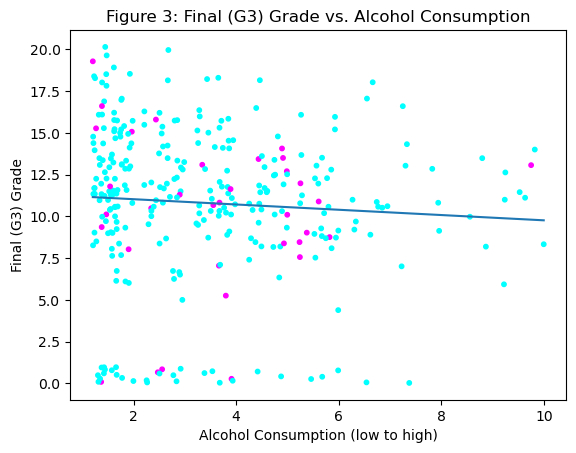

In [9]:
# select data to plot
# weekday and weekend alcohol consumption are added together
x = X_train["Dalc"] + X_train["Walc"]
y = y_train.astype('float')

# to mitigate overlapping points, add random jitter to final grade data
x = x - np.random.rand(len(X_train)) * 0.8
y = y + np.random.rand(len(X_train))
        
# construct scatterplot
plt.scatter(x, y, s=10, c=color, cmap="cool")

# include labels
plt.title("Figure 3: Final (G3) Grade vs. Alcohol Consumption")
plt.xlabel("Alcohol Consumption (low to high)")
plt.ylabel("Final (G3) Grade")

# include trendline
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# display scatterplot
plt.show()


Figure 3 allows us to look for patterns between a student's alcohol consumption and their final (G3) grade. From this visual, we can see that there is not a strong correlation between these variables, though there is perhaps a weak negative correlation. As a student's alcohol consumption increases, their final grade tends to decrease, but the trend is not strong.

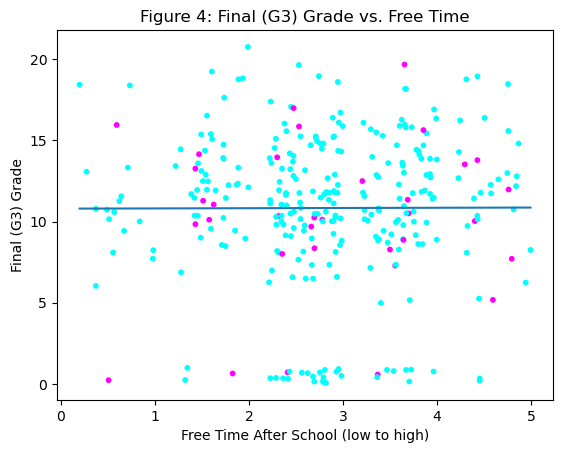

In [10]:
# select data to plot
x = X_train["freetime"].astype('float')
y = y_train.astype('float')

# to mitigate overlapping points, add random jitter to final grade data
x = x - np.random.rand(len(X_train)) * 0.8
y = y + np.random.rand(len(X_train))
        
# construct scatterplot
plt.scatter(x, y, s=10, c=color, cmap="cool")

# include labels
plt.title("Figure 4: Final (G3) Grade vs. Free Time")
plt.xlabel("Free Time After School (low to high)")
plt.ylabel("Final (G3) Grade")

# include trendline
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# display scatterplot
plt.show()


Figure 4 allows us to look for patterns between a student's free time after school and their final (G3) grade. From this visual, we can see that there is not a strong correlation between these variables. One might expect that students with more free time after school would be more likely to have higher final grades, but our data does not support that conclusion. This helps us to realize that we will need to explore other factors, as a student's free time after school is not likely to be a useful predictor of their final grade.

### Exploring Correlation
#### Correlation between Numeric Features and Final (G3) Grade

In [11]:
# select numeric features
student_data_numeric = student_data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_G1', 'absences_G2', 
                                     'absences_G3', 'G1', 'G2', 'G3']]

# explore correlation between numeric features and final (G3) grade
student_data_numeric.corr()['G3']


age           -0.152762
Medu           0.217147
Fedu           0.152457
traveltime    -0.117142
studytime      0.097820
failures      -0.360415
famrel         0.051363
freetime       0.011307
goout         -0.132791
Dalc          -0.054660
Walc          -0.051939
health        -0.061335
absences_G1    0.012485
absences_G2    0.012485
absences_G3    0.067294
G1             0.801468
G2             0.904868
G3             1.000000
Name: G3, dtype: float64

#### Correlation between Categorical Features and Final (G3) Grade

In [12]:
# select categorical features
student_data_categorical = student_data[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                                        'nursery', 'higher', 'internet', 'romantic']]

# use one-hot encoding to represent categorical features
student_data_categorical_one_hot = pd.DataFrame()
student_data_categorical_one_hot.loc[:,'G3'] = student_data['G3']
student_data_categorical_one_hot.loc[:,'school_is_GP'] = student_data_categorical['school'] == 'GP'
student_data_categorical_one_hot.loc[:,'sex_is_female'] = student_data_categorical['sex'] == 'F'
student_data_categorical_one_hot.loc[:,'address_is_urban'] = student_data_categorical['address'] == 'U'
student_data_categorical_one_hot.loc[:,'famsize_greater_than_3'] = student_data_categorical['famsize'] == 'GT3'
student_data_categorical_one_hot.loc[:,'Pstatus_is_together'] = student_data_categorical['Pstatus'] == 'T'
student_data_categorical_one_hot.loc[:,'Mjob_is_teacher'] = student_data_categorical['Mjob'] == 'teacher'
student_data_categorical_one_hot.loc[:,'Mjob_is_health'] = student_data_categorical['Mjob'] == 'health'
student_data_categorical_one_hot.loc[:,'Mjob_is_services'] = student_data_categorical['Mjob'] == 'services'
student_data_categorical_one_hot.loc[:,'Mjob_is_at_home'] = student_data_categorical['Mjob'] == 'at_home'
student_data_categorical_one_hot.loc[:,'Fjob_is_teacher'] = student_data_categorical['Fjob'] == 'teacher'
student_data_categorical_one_hot.loc[:,'Fjob_is_health'] = student_data_categorical['Fjob'] == 'health'
student_data_categorical_one_hot.loc[:,'Fjob_is_services'] = student_data_categorical['Fjob'] == 'services'
student_data_categorical_one_hot.loc[:,'Fjob_is_at_home'] = student_data_categorical['Fjob'] == 'at_home'
student_data_categorical_one_hot.loc[:,'reason_is_home'] = student_data_categorical['reason'] == 'home'
student_data_categorical_one_hot.loc[:,'reason_is_reputation'] = student_data_categorical['reason'] == 'reputation'
student_data_categorical_one_hot.loc[:,'reason_is_course'] = student_data_categorical['reason'] == 'course'
student_data_categorical_one_hot.loc[:,'guardian_is_mother'] = student_data_categorical['guardian'] == 'mother'
student_data_categorical_one_hot.loc[:,'has_schoolsup'] = student_data_categorical['schoolsup'] == 'yes'
student_data_categorical_one_hot.loc[:,'has_famsup'] = student_data_categorical['famsup'] == 'yes'
student_data_categorical_one_hot.loc[:,'has_paid'] = student_data_categorical['paid'] == 'yes'
student_data_categorical_one_hot.loc[:,'has_activities'] = student_data_categorical['activities'] == 'yes'
student_data_categorical_one_hot.loc[:,'had_nursery'] = student_data_categorical['nursery'] == 'yes'
student_data_categorical_one_hot.loc[:,'wants_higher'] = student_data_categorical['higher'] == 'yes'
student_data_categorical_one_hot.loc[:,'has_internet'] = student_data_categorical['internet'] == 'yes'
student_data_categorical_one_hot.loc[:,'has_romantic'] = student_data_categorical['romantic'] == 'yes'

# explore correlation between categorical features and final (G3) grade
student_data_categorical_one_hot.corr()['G3']


G3                        1.000000
school_is_GP              0.045017
sex_is_female            -0.103456
address_is_urban          0.105756
famsize_greater_than_3   -0.081407
Pstatus_is_together      -0.058009
Mjob_is_teacher           0.057712
Mjob_is_health            0.116158
Mjob_is_services          0.078429
Mjob_is_at_home          -0.115634
Fjob_is_teacher           0.095374
Fjob_is_health            0.057111
Fjob_is_services         -0.016108
Fjob_is_at_home          -0.013385
reason_is_home           -0.021359
reason_is_reputation      0.095692
reason_is_course         -0.098950
guardian_is_mother        0.022338
has_schoolsup            -0.082788
has_famsup               -0.039157
has_paid                  0.101996
has_activities            0.016100
had_nursery               0.051568
wants_higher              0.182465
has_internet              0.098483
has_romantic             -0.129970
Name: G3, dtype: float64

## Prepare the Data
### Feature Selection

In [13]:
# due to its minimal correlation to `G3`, the `freetime` feature has been discarded
X_train_numeric = X_train[['age', 'traveltime', 'studytime', 'failures', 'absences_G1', 'absences_G2', 
                                     'absences_G3', 'G1', 'G2']]

# due to minimal correlation to `G3`, the `activities` and `guardian` features have been discarded
X_train_categorical_ordinal = X_train[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
                                       'Fjob', 'reason', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 
                                       'internet', 'romantic', 'famrel', 'goout', 'Dalc', 'Walc', 'health']]


### Custom Transformer

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class AbsenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=True): 
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None): 
        return self
    
    def transform(self, X):
        # add absences from each semester
        total_absences = X[:, 4] + X[:, 5] + X[:, 6]
        
        # conditionally drop G1 and G2 grades        
        if self.drop_G1_G2:
            return np.c_[X[:, :4], total_absences]
        else:
            return np.c_[X[:, :4], total_absences, X[:, 7:]]


### Create Data Pipeline for Numeric Data
Fill in missing values.
Scale continuous numerical data.

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# create pipeline which drops G1 and G2
num_pipeline_drop_G1_G2 = make_pipeline(
    # fill in missing values using the median
    SimpleImputer(strategy="median"),
    # scale the continuous numerical data
    StandardScaler(),
    # apply custom transformer
    AbsenceTransformer())

# create pipeline that keeps G1 and G2
num_pipeline_keep_G1_G2 = make_pipeline(
    # fill in missing values using the median
    SimpleImputer(strategy="median"),
    # scale the continuous numerical data
    StandardScaler(),
    # apply custom transformer
    AbsenceTransformer(drop_G1_G2=False))


### Create Data Pipeline to Ordinal Encode Categorical/Ordinal Data

In [16]:
from sklearn.preprocessing import OrdinalEncoder

cat_ord_pipeline = make_pipeline(
    OrdinalEncoder())


### Create Column Transformer

In [1]:
from sklearn.compose import ColumnTransformer

# obtain list of column names
num_attribs = list(X_train_numeric)
cat_ord_attribs = list(X_train_categorical_ordinal)

# create full pipeline that drops G1 and G2
preprocessing_drop_G1_G2 = ColumnTransformer([
        ("num", num_pipeline_drop_G1_G2, num_attribs),
        ("cat_ord", cat_ord_pipeline, cat_ord_attribs)])

# create full pipeline that keeps G1 and G2
preprocessing_keep_G1_G2 = ColumnTransformer([
        ("num", num_pipeline_keep_G1_G2, num_attribs),
        ("cat_ord", cat_ord_pipeline, cat_ord_attribs)])


X_train_prepared_keep_G1_G2 = preprocessing_keep_G1_G2.fit_transform(X_train)

X_train_prepared_keep_G1_G2.shape



NameError: name 'X_train_numeric' is not defined

### Transform Training Data
#### Without G1 and G2 (default)

In [18]:
# call our full pipeline (passing in our test set) to obtain a totally clean and transformed dataframe
X_train_prepared_drop_G1_G2 = preprocessing_drop_G1_G2.fit_transform(X_train)

# check shape of prepared training dataset
X_train_prepared_drop_G1_G2.shape


(316, 27)

#### With G1 and G2 (default)

In [19]:
# call our full pipeline (passing in our test set) to obtain a totally clean and transformed dataframe
X_train_prepared_keep_G1_G2 = preprocessing_keep_G1_G2.fit_transform(X_train)

# check shape of prepared training dataset
X_train_prepared_keep_G1_G2.shape


(316, 29)

In [20]:
pd.DataFrame(X_train_prepared_drop_G1_G2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.604765,-0.625779,-0.056853,-0.456744,-1.438113,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1,-0.604765,0.828236,-1.254553,-0.456744,-1.788175,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,4.0,2.0,0.0,0.0,2.0
2,-0.604765,-0.625779,-0.056853,3.628097,-1.788175,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,2.0
3,-0.604765,-0.625779,1.140847,-0.456744,-1.438113,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,3.0
4,-0.604765,0.828236,-1.254553,-0.456744,-1.788175,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,-1.404370,-0.625779,2.338548,-0.456744,-1.788175,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0
312,-1.404370,-0.625779,2.338548,-0.456744,-1.088052,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0
313,1.794052,-0.625779,-0.056853,2.266484,3.092929,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,2.0,4.0
314,0.194841,-0.625779,1.140847,-0.456744,-1.788175,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,2.0,3.0


## Shortlist Promising Models
### Fit Models


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# fit a linear regression model, dropping G1 and G2
lin_reg_drop_G1_G2 = LinearRegression()
lin_reg_drop_G1_G2.fit(X_train_prepared_drop_G1_G2, y_train)
# fit a linear regression model, keeping G1 and G2
lin_reg_keep_G1_G2 = LinearRegression()
lin_reg_keep_G1_G2.fit(X_train_prepared_keep_G1_G2, y_train)

# fit a decision tree regression model, dropping G1 and G2
tree_reg_drop_G1_G2 = DecisionTreeRegressor(random_state=42)
tree_reg_drop_G1_G2.fit(X_train_prepared_drop_G1_G2, y_train)
# fit a decision tree regression model, keeping G1 and G2
tree_reg_keep_G1_G2 = DecisionTreeRegressor(random_state=42)
tree_reg_keep_G1_G2.fit(X_train_prepared_keep_G1_G2, y_train)

# fit a random forest regression model, dropping G1 and G2
forest_reg_drop_G1_G2 = RandomForestRegressor(random_state=42)
forest_reg_drop_G1_G2.fit(X_train_prepared_drop_G1_G2, y_train)
# fit a random forest regression model, keeping G1 and G2
forest_reg_keep_G1_G2 = RandomForestRegressor(random_state=42)
forest_reg_keep_G1_G2.fit(X_train_prepared_keep_G1_G2, y_train)


RandomForestRegressor(random_state=42)

### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

model_list = ['lin_reg_drop_G1_G2', 'lin_reg_keep_G1_G2', 'tree_reg_drop_G1_G2', 
          'tree_reg_keep_G1_G2', 'forest_reg_drop_G1_G2', 'forest_reg_keep_G1_G2']

rmse_list = [-cross_val_score(lin_reg_drop_G1_G2, X_train_prepared_drop_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),
        -cross_val_score(lin_reg_keep_G1_G2, X_train_prepared_keep_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),
        -cross_val_score(tree_reg_drop_G1_G2, X_train_prepared_drop_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),        
        -cross_val_score(tree_reg_keep_G1_G2, X_train_prepared_keep_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),
        -cross_val_score(forest_reg_drop_G1_G2, X_train_prepared_drop_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),
        -cross_val_score(forest_reg_keep_G1_G2, X_train_prepared_keep_G1_G2, y_train, scoring="neg_root_mean_squared_error", cv=10).mean(),
        ]

pd.DataFrame({'Model':model_list, 'RMSE':rmse_list})


,Model,RMSE
0,lin_reg_drop_G1_G2,4.407055
1,lin_reg_keep_G1_G2,1.894938
2,tree_reg_drop_G1_G2,4.948836
3,tree_reg_keep_G1_G2,1.773910
4,forest_reg_drop_G1_G2,3.757934
5,forest_reg_keep_G1_G2,1.397647


## Fine Tune the System
Our best model was the Random Forest model that used G1 and G2 grades as predictors. However, because we'd like our model to be able to predict new cases without G1 and G2 grades, we will choose to move forward with our best model that ignores G1 and G2 grades, which also happens to be a Random Forest regressor model. We will continue with this model and move on to fine tuning its hyperparameters.

### Grid Search


In [23]:
from sklearn.model_selection import GridSearchCV

# select hyperparameter values to try in combination
params = {'n_estimators': [25, 50, 100, 200], 'max_features': [.1, .5, 1, 2, 5, 10, 20, 50, 100]}

# instantiate grid search
grid_search = GridSearchCV(forest_reg_drop_G1_G2, params, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

# run grid search
grid_search.fit(X_train_prepared_drop_G1_G2, y_train)

# check best combination of hyperparameters
grid_search.best_params_


{'max_features': 20, 'n_estimators': 100}

### Transform Test Set

In [24]:
# transform test set
X_test_prepared_drop_G1_G2 = preprocessing_drop_G1_G2.transform(X_test)

# check resulting shape
X_test_prepared_drop_G1_G2.shape


(79, 27)

### Evaluate Model on Test Set

In [26]:
from sklearn.metrics import mean_squared_error

# select final model
final_model = grid_search.best_estimator_

# make predictions with final model on test set
final_predictions = final_model.predict(X_test_prepared_drop_G1_G2)

# calculate RMSE of model using test set
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)


# return results
final_rmse


/Users/dthomas/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.78600905399895

## Conclusion
Our final model performed only slightly worse on our test set than it had on the training set (before fine tuning its hyperparameters). This is to be expected, as the test set data was hitherto unseen by the model. <br> <br>
Our final model was capable of predicting a student's final grade with a root mean squared error of ~3.8, while the final (G3) grade data had a mean of ~10.3 and standard deviation of ~4.6. <br> <br>
The model's predictions are reasonably accurate. On average, the predictions were off by ~3.8 points. This model can be used to identify students for whom academic intervention may be necessary. We have accomplished our goal of being able to predict future academic success based on current student attributes. There is likely room for improvement, but this is a useful predictive model. <br> <br>
As one final reminder, the predictive model we have created is useful, but not flawless; and therefore we must be mindful about how we use it.

## Reflection
I am pleased that the project resulted in a reasonably accurate model. The RMSE of our predictions was significant, but not enormous compared to the distribution of our target variable. <br> <br>
I found my implementation of keeping/dropping the G1 & G2 grades to be cumbersome. I'd be interested to see other ideas for how to implement this more elegantly. <br> <br>
Were I to spend more time on this project, I'd go back and try eliminating more features in hopes of producing a better model.